In [2]:
%matplotlib inline
import os
import json
from importlib import reload

from matplotlib import pyplot as plt
from scipy.signal import spectrogram, hanning
import numpy as np
import pandas as pd

import mne
from mne.time_frequency import tfr_morlet

In [3]:
#Set working directory where your .mat file is
#os.getcwd() for finding current working directory
os.chdir('/Users/barbaramathiopoulou/Documents/PhD_worken/Dyskinesia_Project/Sub_data/Sub025_12mfu/Trial_Jupyter/')

In [4]:
#Import file (change the filename) as mne object
raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense20220628065100.mat',info = None)

/opt/anaconda3/lib/python3.7/site-packages/mne/externals/pymatreader/utils.py:213: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
<ipython-input-4-d578468cddb9>:2: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense20220628065100.mat',info = None)
<ipython-input-4-d578468cddb9>:2: RuntimeWarning: 4 channel names are too long, have been truncated to 15 characters:
['LFP_L_13_STN_PEAK63Hz_THR20-30_AVG3000ms', 'LFP_R_13_PEAK76Hz_THR20-30_AVG1000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us']
  raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense202206280651

Creating RawArray with float64 data, n_channels=6, n_times=197187
    Range : 0 ... 197186 =      0.000 ...   788.744 secs
Ready.


<ipython-input-4-d578468cddb9>:2: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense20220628065100.mat',info = None)
<ipython-input-4-d578468cddb9>:2: RuntimeWarning: Cannot guess the correct type of channel LFP_L_13_STN. Making it a MISC channel.
  raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense20220628065100.mat',info = None)
<ipython-input-4-d578468cddb9>:2: RuntimeWarning: Cannot guess the correct type of channel LFP_R_13_STN. Making it a MISC channel.
  raw = mne.io.read_raw_fieldtrip('sub-20210630PSTN_ses-2022062806215184_run-BrainSense20220628065100.mat',info = None)
<ipython-input-4-d578468cddb9>:2: RuntimeWarning: Cannot guess the correct type of channel LFP_L_13_STN_PEAK63Hz_THR20-30_AVG3000ms. Making it a MISC channel.
  raw = mne.io.rea

In [11]:
print(raw) #here you can see the number of samples and the time
print(raw.info) #ch_names, sfreq, nchan.
n_time_samps = raw.n_times #nsamples
time_secs = raw.times #timepoints
raw.info.keys()
ch_names = raw.ch_names
n_chan = len(ch_names) 

<RawArray | 6 x 197187 (788.7 s), ~9.0 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: LFP_L_13_STN, LFP_R_13_STN, LFP_L_13_STN_PE, LFP_R_13_PEAK76, ...
 chs: 4 MISC, 2 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>


In [12]:
print(ch_names)
#print(raw._data[2,:])
raw_data = raw.get_data()
print(raw_data.shape)
mydat = raw.get_data(picks='LFP_R_13_STN')
print(mydat)
#fig, ax = plt.subplots(figsize=[15, 5])
#ax.plot(mydat)
#plt.show()

['LFP_L_13_STN', 'LFP_R_13_STN', 'LFP_L_13_STN_PE', 'LFP_R_13_PEAK76', 'STIM_L_125Hz_60', 'STIM_R_125Hz_60']
(6, 197187)
[[-1.48684281  0.         -0.22874505 ... -4.57490095 -1.71558786
  -0.11437252]]


In [7]:
raw.__dict__

{'_data': array([[ 6.63360638,  2.97368562,  6.29048881, ..., -6.17611628,
         -4.3461559 , -4.3461559 ],
        [-1.48684281,  0.        , -0.22874505, ..., -4.57490095,
         -1.71558786, -0.11437252],
        [20.        , 20.        , 20.        , ...,         nan,
                 nan,         nan],
        [ 8.        ,  8.        ,  8.        , ...,         nan,
                 nan,         nan],
        [ 0.        ,  0.        ,  0.        , ...,         nan,
                 nan,         nan],
        [ 3.        ,  3.        ,  3.        , ...,         nan,
                 nan,         nan]]),
 'preload': True,
 '_last_samps': array([197186]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: LFP_L_13_STN, LFP_R_13_STN, LFP_L_13_STN_PE, LFP_R_13_PEAK76, ...
  chs: 4 MISC, 2 STIM
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 125.0 Hz
  meas_date: unspecified
  nchan: 6
  projs: []
  sfreq: 250.0 Hz
 >,
 'buffer_size

In [13]:
raw.info['ch_names']

['LFP_L_13_STN',
 'LFP_R_13_STN',
 'LFP_L_13_STN_PE',
 'LFP_R_13_PEAK76',
 'STIM_L_125Hz_60',
 'STIM_R_125Hz_60']

In [14]:
chNamesList = raw.info['ch_names']
chNamesArr = np.array(chNamesList)
# plt.plot(raw_data[0, :])

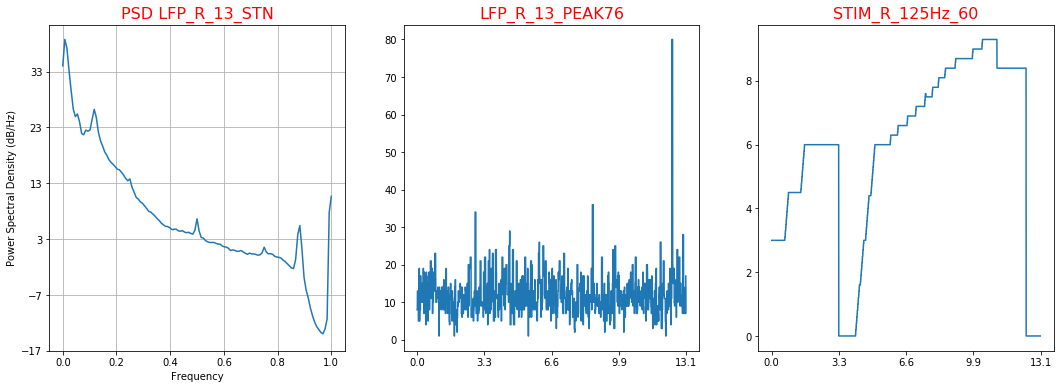

In [17]:
#Make some nice plots of the data

#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]

plot_times = raw.times #time
xticks = np.linspace(0, plot_times[-1], 5) #make 5 x-axis ticks, dividing the seconds by 5

fig, axes = plt.subplots(
    1, len(chs_to_plot), figsize=(18, 6)
) #define n of subplots and size

# axes = axes.flatten()
ax_c = 0

for i, name in enumerate(chNamesList):

    
    if name in chs_to_plot:

        if name[-3:] == 'STN':
            axes[ax_c].psd(raw_data[i, :])
            axes[ax_c].set_title(
                f'PSD {name}',
                fontsize=16, color='r'
            )

        else:
            
            axes[ax_c].plot(plot_times, raw_data[i, :])
            axes[ax_c].set_title(name, fontsize=16, color='r')
            axes[ax_c].set_xticks(xticks)
            axes[ax_c].set_xticklabels(np.around(xticks / 60, 1))
                
        ax_c += 1
        
        
# chNamesArr == ch_to_plot

In [21]:
a = 55.5

In [22]:
(f'channel1 {name}, #{a}'
 ' because ut was too long')

'channel1 STIM_R_125Hz_60, #55.5 because ut was too long'

In [23]:
chNamesList.index(ch_to_plot)

NameError: name 'ch_to_plot' is not defined

Effective window size : 8.192 (s)


<ipython-input-9-3c6590db5d07>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 20, dB = False, estimate = 'amplitude')


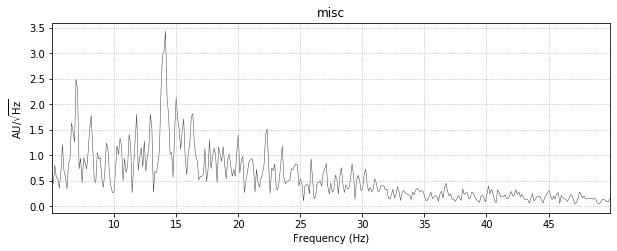

Effective window size : 8.192 (s)


<ipython-input-9-3c6590db5d07>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 60, tmax = 80,  dB = False, estimate = 'amplitude')


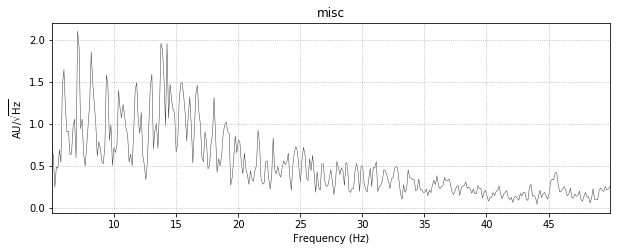

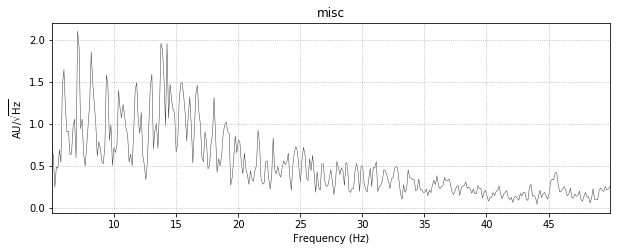

In [9]:
raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 20, dB = False, estimate = 'amplitude')
raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 60, tmax = 80,  dB = False, estimate = 'amplitude')

In [10]:
print(type(raw._data))
print(raw._data.shape)
scan_durn = raw._data.shape[1] / raw.info['sfreq']
print('Duration of LFP recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')
print(raw._data[1, :])

chan = 1 # set channel we want
start_time = int((1000 / 1000) * raw.info['sfreq'])
end_time   = int((10000 / 1000) * raw.info['sfreq'])
raw._data[chan, start_time:end_time]

<class 'numpy.ndarray'>
(6, 197187)
Duration of LFP recording =  788.748 s, or 13.145800000000001 min.
[-1.48684281  0.         -0.22874505 ... -4.57490095 -1.71558786
 -0.11437252]


array([ 8.57793928, 11.09413481, 11.5516249 , ...,  4.68927348,
       -3.77429328, -9.26417443])

In [30]:
mydat = raw.get_data(picks=['LFP_R_13_STN'], start=1, stop=201)
print(mydat.shape)

(1, 200)


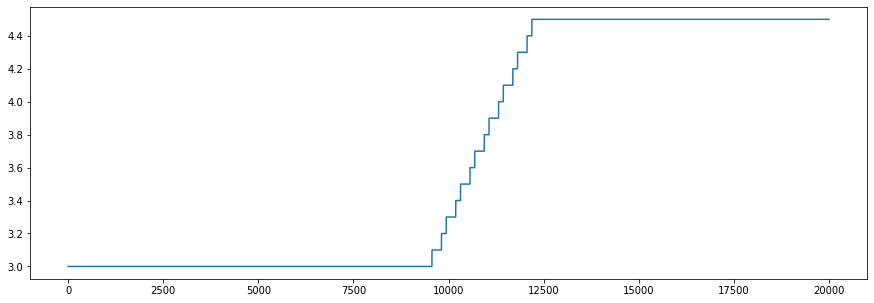

In [12]:
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(raw.get_data(picks='STIM_R_125Hz_60',start=1, stop=20000).T)
plt.show()

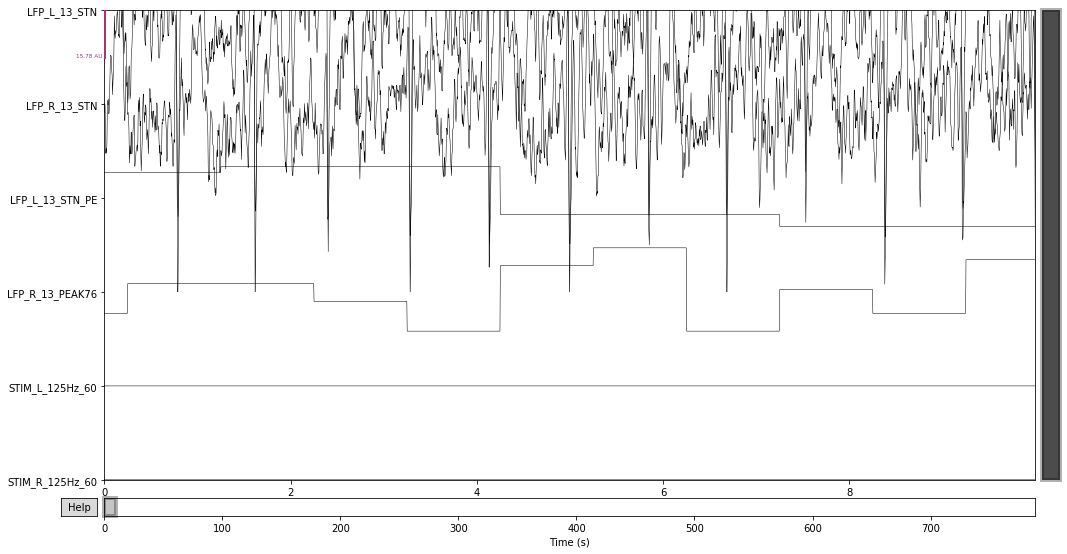

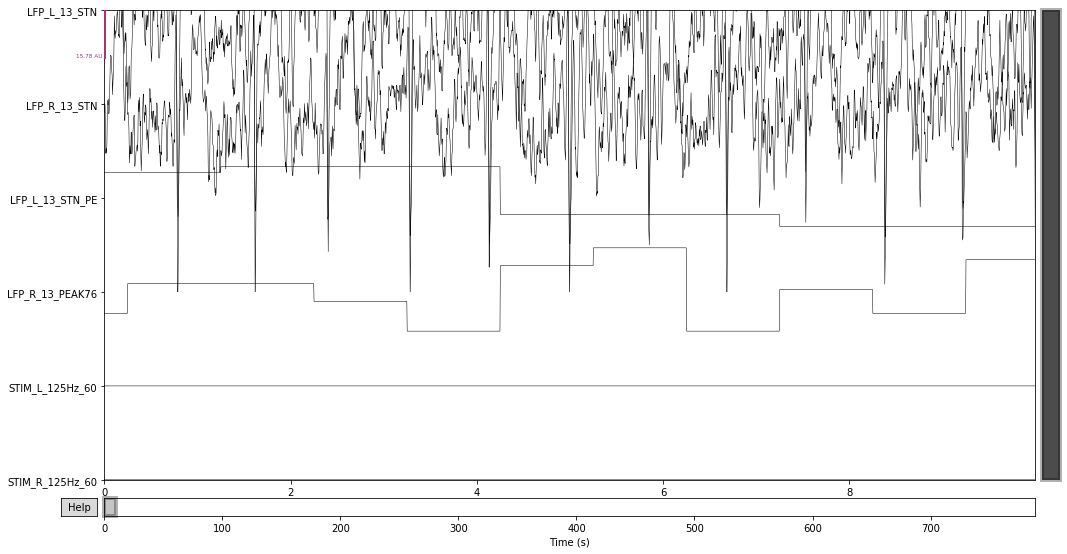

In [17]:
#%matplotlib inline
raw.plot(raw.get_data(picks='LFP_R_13_STN'))

In [14]:
#Pick only channel one and two
raw.info['bads'] = ['LFP_R_13_STN','LFP_L_13_STN_PE', 'LFP_R_13_PEAK76', 'STIM_L_125Hz_60', 'STIM_R_125Hz_60'] 
picks = mne.pick_types(raw.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads')

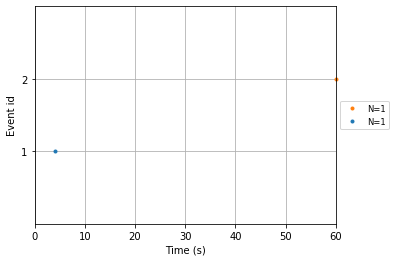

Not setting metadata
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2 events and 2501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-103-76e7b6e0d455>:8: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks = 0)


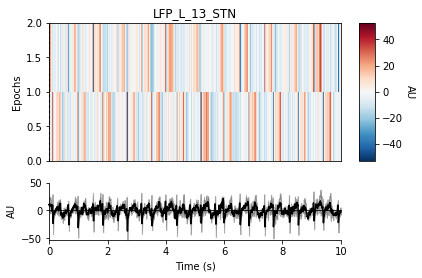

[<Figure size 432x288 with 3 Axes>]

In [103]:
#events = mne.find_events(raw, stim_channel='LFP_R_13_STN')
trial_onsets = np.array([
       [ 1000 ,      0 ,    1],
       [ 15000 ,      0 ,    2 ]]) #we need the samples
event_dict = {'NoStim':1,'Threshold':2}
fig = mne.viz.plot_events(trial_onsets, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)
epochs = mne.Epochs(raw,events=trial_onsets,event_id = event_dict, tmin=0, tmax=10, baseline = None, preload = True)
epochs.plot_image(picks = 0)

Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-16-b9a7e0e62abd>:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  stim_ep.plot_image(picks = 1)


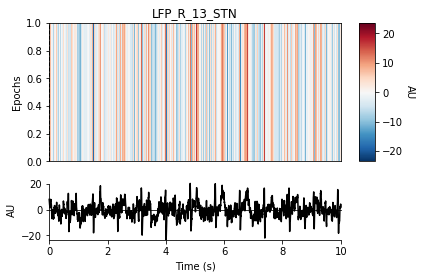

[<Figure size 432x288 with 3 Axes>]

In [16]:
nostim_ep = epochs['NoStim']
stim_ep = epochs['Threshold']
stim_ep.plot_image(picks = 1)

In [104]:
M = 200
NFFT = M
win = hanning(M)
overlap = 0.25
overlap_samples = int(round(M*overlap)) # overlap in samples
t, f, S = spectrogram(mydat,window=win,nperseg=M,noverlap=overlap_samples,nfft=NFFT)

# Compute average spectrum
avg_S = np.mean(S,axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
vars(tfr_morlet)

{'__wrapped__': <function mne.time_frequency.tfr.tfr_morlet(inst, freqs, n_cycles, use_fft=False, return_itc=True, decim=1, n_jobs=1, picks=None, zero_mean=True, average=True, output='power', verbose=None)>,
 '__qualname__': 'tfr_morlet',
 '__source__': "def tfr_morlet(inst, freqs, n_cycles, use_fft, return_itc, decim, n_jobs, picks, zero_mean, average, output, verbose):\n\n    try:\n        verbose\n    except UnboundLocalError:\n        try:\n            verbose = self.verbose\n        except NameError:\n            raise RuntimeError('Function %s does not accept verbose parameter'\n                               % (_function_,))\n        except AttributeError:\n            raise RuntimeError('Method %s class does not have self.verbose'\n                               % (_function_,))\n    else:\n        if verbose is None:\n            try:\n                verbose = self.verbose\n            except (NameError, AttributeError):\n                pass\n    if verbose is not None:\n   

In [115]:
freqs = np.arange(1, 125)
D = tfr_morlet(epochs, freqs=freqs, n_cycles=6, return_itc=False, average=True, picks = 1)

In [108]:
spectrogram(
    mydat,
    fs=125.0, 
#             window=('hanning', 0.25), 
    nperseg=1, noverlap=0.25, nfft=None, detrend='constant', 
                         return_onesided=True, scaling='density', axis=- 1, mode='psd')

(array([0.]),
 array([4.000000e-03, 1.200000e-02, 2.000000e-02, ..., 1.577476e+03,
        1.577484e+03, 1.577492e+03]),
 array([[[0., 0., 0., ..., 0., 0., 0.]]]))

In [19]:
raw = raw.filter(l_freq=90, h_freq=5, picks=[0,1])

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 5 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 413 samples (1.652 sec)



In [116]:
#epochs.plot_psd(fmin=5, fmax=90)
D.plot(fmin=5, fmax=40, picks = 1)

ValueError: All picks must be < n_channels (1), got 1

No baseline correction applied


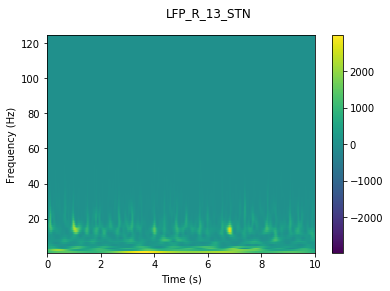

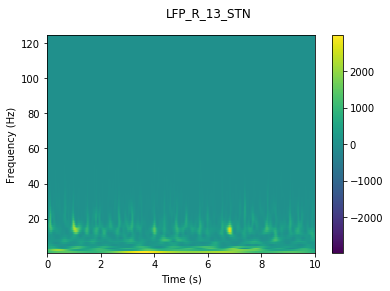

In [121]:
D.plot(mode='zlogratio', picks = 0, baseline=None,
#        vmin = -3, vmax = 8,
       cmap='viridis',
)

In [94]:
%matplotlib
D.plot(events = trial_onsets, start = 80, duration = 7, n_channels = 1)

Using matplotlib backend: MacOSX


TypeError: plot() got an unexpected keyword argument 'start'